# Supplementary Notebook
## see on https://github.com/erezli/IIBCW_simplified_chemotaxis_model

<IPython.core.display.Javascript object>


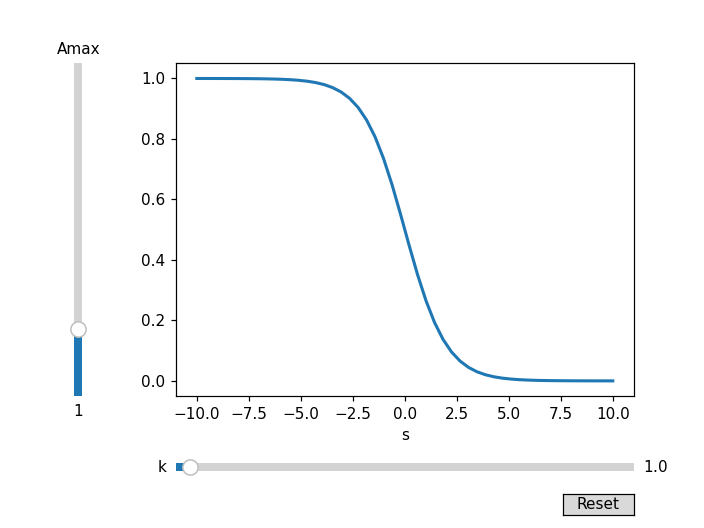

0.2689414213699951


In [3]:
# modified from https://matplotlib.org/stable/gallery/widgets/slider_demo.html
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

x = np.linspace(-10, 10)

def f(x, k=1, A=1):
    A_min = 0
    return (A - A_min) / (1 + np.exp(k * x)) + A_min

fig, ax = plt.subplots()
line, = ax.plot(x, f(x), lw=2)
print(f(1, k=1, A=1))
ax.set_xlabel('s')

fig.subplots_adjust(left=0.25, bottom=0.25)

axk = fig.add_axes([0.25, 0.1, 0.65, 0.03])
k_slider = Slider(
    ax=axk,
    label='k',
    valmin=0.1,
    valmax=30,
    valinit=1,
)

axA = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
A_slider = Slider(
    ax=axA,
    label="Amax",
    valmin=0,
    valmax=5,
    valinit=1,
    orientation="vertical"
)

def update(val):
    line.set_ydata(f(x, k_slider.val, A_slider.val))
    fig.canvas.draw_idle()

k_slider.on_changed(update)
A_slider.on_changed(update)
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    k_slider.reset()
    A_slider.reset()

button.on_clicked(reset)
plt.show()